In [1]:
import os
print(os.getcwd())


f:\KAIM\Predicting-Price-Moves-\notebooks


In [2]:
import pandas as pd
from pathlib import Path

path = Path("data/yfinance_data/AMZN_historical_data.csv")
print(path.resolve())
print(path.exists())
df = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"])



F:\KAIM\Predicting-Price-Moves-\notebooks\data\yfinance_data\AMZN_historical_data.csv
False


In [3]:
print(df.head)

<bound method NDFrame.head of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \


In [4]:
df.tail

<bound method NDFrame.tail of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \


In [5]:
import pandas as pd
from eda import plot_daily_news_volume, plot_top_stocks, plot_publisher_distribution
!pip install c:\Users\user\Downloads\ta_lib-0.6.3-cp311-cp311-win_amd64.whl
!pip install yfinance

Processing c:\users\user\downloads\ta_lib-0.6.3-cp311-cp311-win_amd64.whl
ta-lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [6]:
import yfinance as yf

df_price = yf.download("AMZN", start="2011-01-01", end="2024-06-30")
df_price.reset_index(inplace=True)  # Make 'date' a column
df_price.rename(columns=str.lower, inplace=True)  # lower-case column names

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
print(df_price)

Price        date       close        high         low        open     volume
Ticker                   amzn        amzn        amzn        amzn       amzn
0      2011-01-03    9.211000    9.300000    9.060500    9.068500  106628000
1      2011-01-04    9.250500    9.385000    9.189000    9.307500  100636000
2      2011-01-05    9.371000    9.372500    9.203500    9.205000   68376000
3      2011-01-06    9.293000    9.370500    9.262500    9.325000   63594000
4      2011-01-07    9.274500    9.422500    9.187000    9.394000  104434000
...           ...         ...         ...         ...         ...        ...
3389   2024-06-24  185.570007  191.000000  185.330002  189.330002   50610400
3390   2024-06-25  186.339996  188.839996  185.419998  186.809998   45898500
3391   2024-06-26  193.610001  194.800003  186.259995  186.919998   65103900
3392   2024-06-27  197.850006  199.839996  194.199997  195.009995   74397500
3393   2024-06-28  193.250000  198.850006  192.500000  197.729996   76930200

In [8]:
# Flatten the MultiIndex columns
df_price.columns = df_price.columns.get_level_values(1)

# Make column names lowercase
df_price.columns = [col.lower() for col in df_price.columns]
df_price.columns = ['date', 'close', 'high', 'low', 'open', 'volume']

# Ensure 'date' is in datetime format
df_price['date'] = pd.to_datetime(df_price['date'])

# Optional: sort by date
df_price = df_price.sort_values('date').reset_index(drop=True)

# Check
print(df_price.columns)
print(df_price.head())


Index(['date', 'close', 'high', 'low', 'open', 'volume'], dtype='object')
        date   close    high     low    open     volume
0 2011-01-03  9.2110  9.3000  9.0605  9.0685  106628000
1 2011-01-04  9.2505  9.3850  9.1890  9.3075  100636000
2 2011-01-05  9.3710  9.3725  9.2035  9.2050   68376000
3 2011-01-06  9.2930  9.3705  9.2625  9.3250   63594000
4 2011-01-07  9.2745  9.4225  9.1870  9.3940  104434000


In [9]:
print(df_price.head())

        date   close    high     low    open     volume
0 2011-01-03  9.2110  9.3000  9.0605  9.0685  106628000
1 2011-01-04  9.2505  9.3850  9.1890  9.3075  100636000
2 2011-01-05  9.3710  9.3725  9.2035  9.2050   68376000
3 2011-01-06  9.2930  9.3705  9.2625  9.3250   63594000
4 2011-01-07  9.2745  9.4225  9.1870  9.3940  104434000


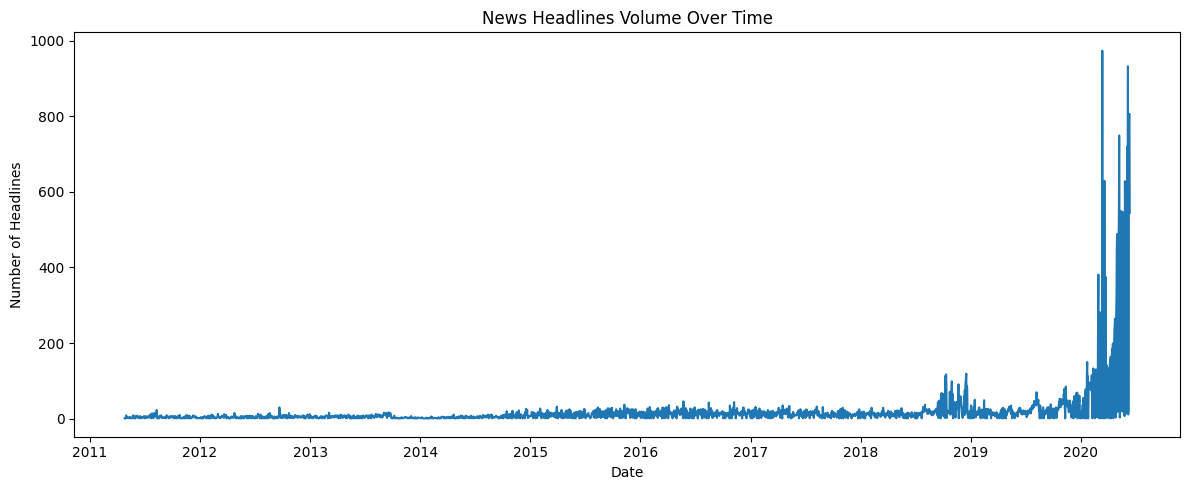

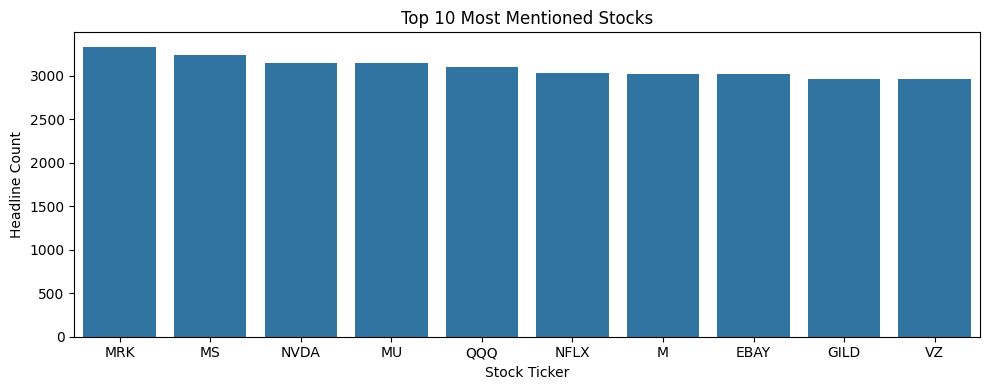

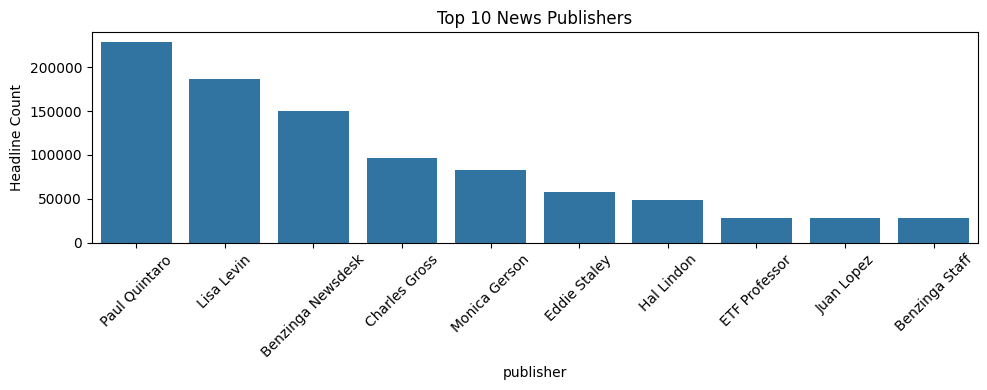

In [10]:

import talib
import pandas as pd
from quant_stat import add_technical_indicators, describe_price_statistics
from eda import plot_top_stocks, plot_daily_news_volume, plot_publisher_distribution, plot_headline_length_distribution

df_news = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"])
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')

plot_daily_news_volume(df_news)
plot_top_stocks(df_news)
plot_publisher_distribution(df_news)

In [11]:
df_price = add_technical_indicators(df_price)
describe_price_statistics(df_price)

,close,daily_return,sma_10,ema_10,atr
count,3394.000000,3393.000000,3385.000000,3385.000000,3380.000000
mean,71.629038,0.001110,71.553476,71.554984,1.884995
std,57.201007,0.020662,57.017262,56.998129,1.723473
min,8.048500,-0.140494,8.229750,8.256712,0.186456
25%,16.323250,-0.008946,16.359250,16.322618,0.403716
50%,50.129250,0.000955,50.013850,49.997410,0.989504
75%,116.677500,0.011764,116.673000,116.946256,3.371791
max,197.850006,0.157457,188.233002,189.686505,7.027174


In [ ]:
from analyzer import apply_sentiment_analysis
df_news = apply_sentiment_analysis(df_news)

print(df_news)

In [ ]:
# Ensure both dates are datetime.date
df_news['date'] = pd.to_datetime(df_news['date']).dt.date
df_price['date'] = pd.to_datetime(df_price['date']).dt.date

# Daily average sentiment score using 'sentiment' column
daily_sentiment = df_news.groupby('date')['sentiment'].mean().reset_index()

# Merge with price data
df_merged = pd.merge(df_price, daily_sentiment, on='date', how='left')

# Preview
print(df_merged[['date', 'close', 'sentiment']].tail())

            date       close  sentiment
3389  2024-06-24  207.171127        NaN
3390  2024-06-25  208.096802        NaN
3391  2024-06-26  212.257339        NaN
3392  2024-06-27  213.103394        NaN
3393  2024-06-28  209.639557        NaN


In [ ]:
from corr import add_more_indicators
df_price = add_more_indicators(df_price)
df_price['norm_return'] = (df_price['close'] / df_price['close'].iloc[0]) - 1
df_merged = df_merged.sort_values('date').copy()
df_merged = add_more_indicators(df_merged)
df_corr_ready = df_merged.dropna(subset=['sentiment', 'rsi_14', 'macd', 'macd_signal', 'macd_hist'])
correlation_results = df_corr_ready[['sentiment', 'rsi_14', 'macd', 'macd_signal', 'macd_hist']].corr()
print(correlation_results)


             sentiment    rsi_14      macd  macd_signal  macd_hist
sentiment     1.000000  0.002955 -0.009063    -0.013525   0.013812
rsi_14        0.002955  1.000000  0.686582     0.593950   0.465616
macd         -0.009063  0.686582  1.000000     0.963266   0.333485
macd_signal  -0.013525  0.593950  0.963266     1.000000   0.068060
macd_hist     0.013812  0.465616  0.333485     0.068060   1.000000


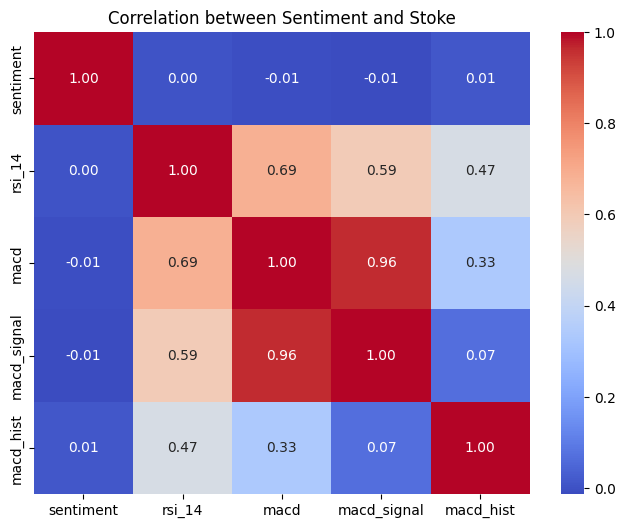

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Sentiment and Stoke")
plt.show()